# Poisson Regression

In this R Jupyter notebook, we go through the code implementation for a Poisson regression model. In particular, we are interested in whether the number of page views on the day of midterm 2 is related to both midterm 1 score AND gender.

## 1. Loading the data

If the data size is not large, it may be convenient to make two data vectors manually as follows.

In [1]:
midterm1 <- c(23, 22.5, 21.5, 21.25, 13, 25, 14.5, 20, 18, 18, 19.5, 
              25, 23, 19, 24, 20, 24, 24, 18.5, 18, 16, 21.85, 25, 19.5) # explanatory variable 1

gender <- c(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1) # explanatory variable 2

page <- c(30, 246, 75, 167, 40, 12, 28, 32, 56, 58, 73, 94, 240, 54, 37, 44, 34, 36, 
          17, 18, 40, 40, 40, 62) # response variable

If the data size is not small enough for a manual input, we have to load the data. The following is an example of loading the data "page.csv" from my desktop folder. Please refer to the previous jupyter notebooks, especially "SLR.ipynb", which contains details of loading the data.

In [2]:
setwd("~/Desktop/")
data <- read.csv("page.csv", header = TRUE) # R is case-sensitive
head(data)
page <- data[, 1]
midterm1 <- data[, 2]
gender <- data[, 3]

,page,midterm1,gender
,<int>,<dbl>,<int>
1,30,23.00,0
2,246,22.50,0
3,75,21.50,0
4,167,21.25,0
5,40,13.00,0
6,12,25.00,0


For Window users, the fist line of the code above is replaced with

setwd("C:/Users/hyungsuktak/Desktop/")

If the data file is a .txt file, then the following code will be used instead.

midterm <- read.table("page.txt", header = TRUE)

To check whether the data are correctly loaded, we use the function "head" that shows the first six lines of the data. To avoid any mistake, it is better to check whether the first row is correctly loaded. In this case, the first row correctly starts with (30, 23, 0).

Next, we designate each column of the data to an object, as we input manually in the beginning. 

Now the data are loaded, and we are ready to conduct a multiple linear regression analysis.

## 2. Visualizing the data

In a Poisson regression analysis, it is important to display a pairwise scatter plot of $\log(Y)$ on $X_i$'s (exploratory variables). To add  more information to a common scatter plot, we define two functions as follows. Please copy and paste without any modifications.

In [3]:
panel.hist <- function(x, ...)
{
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(usr[1 : 2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts
    y <- y / max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "grey", ...)
}

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- cor(x, y)
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8 / strwidth(txt)
    text(0.5, 0.5, txt, cex = 2)
}

Using these two functions, we can insert more information to the scatter plot as follows. Note that we use log(page) instead of page for this plot.

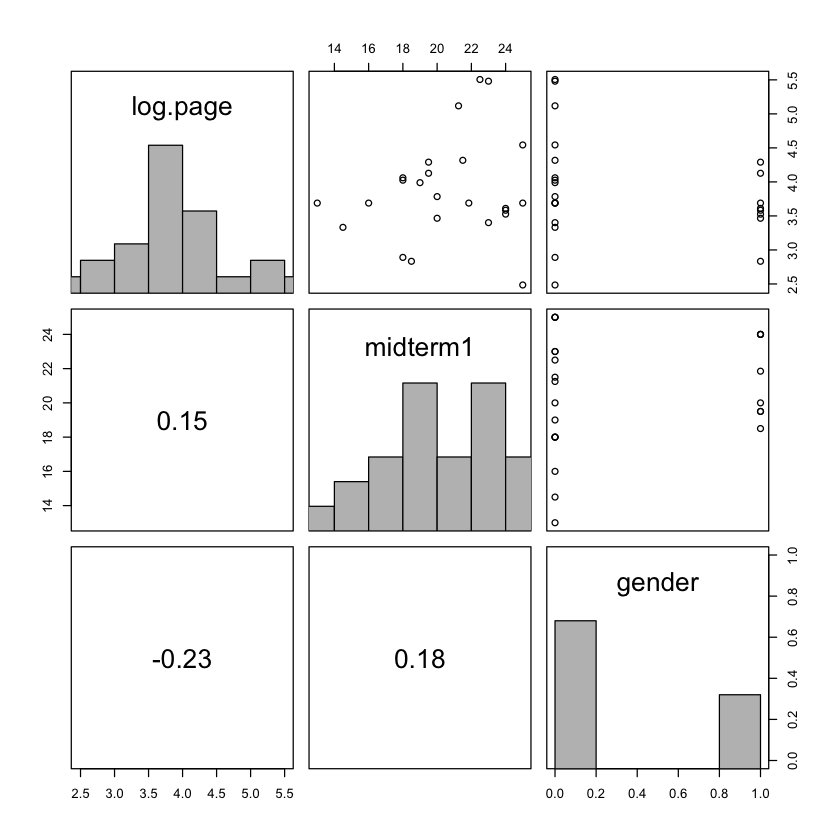

In [4]:
log.page <- log(page)
pairs(cbind(log.page, midterm1, gender), diag.panel = panel.hist, lower.panel = panel.cor)

The most important information comes from the row of log.page, i.e., the first row in the scatter plot above. This is because it shows the marginal relationships between the log of response variable and each exploratory variable, which gives insight into possible regression models.

Although a quadratic relationship between log(page) and midterm1 may appear reasonable, it also seems appropriate to assume a linear relationship between log(page) and midterm1, considering the dot on the bottom-right corner. As for gender, there seems a difference in log(page) between two genders because the average of log(page) of female students (gender = 1) looks higher than that of male students (gender = 0).


## 3. Fitting a logistic regression model

The Poisson regression model assumes that each count datum  $Y_i$ is an independent (but not identically distributed) Poisson random variable with the rate parameter (mean count) equal to $\lambda_i$, i.e.,

$$
Y_i\stackrel{\textrm{ind.}}{\sim} \textrm{Pois}(\lambda_i)
$$

The mean of the response variable $\lambda_i$ is connected to a linear function of regression coefficient via a logarithmic link function. The main reason for this transformation is to match the ranges of $g(\lambda_i)$ and the linear function.

$$
\log(\lambda_i)=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon_i=x_i^{\top}\beta,
$$

where $x_{i1}$ is the midterm 1 score  of the $i$-th person, $x_{i2}$ is the indicator variable for female. The model also shows the matrix notation: $x_i=(1, x_{i1}, x_{i2})^{\top}$ and $\beta=(\beta_0, \beta_1, \beta_2)^{\top}$. We note that vectors are basically column vectors (default in mathematics). In this model, $\beta_0, \beta_1, \beta_2$ are unknown parameters.

The code below fits a logistic regression model and saves the fit in the object "res". To see the fit, let's type the following line.

In [5]:
res <- glm(page ~ midterm1 + gender, family = poisson)
summary(res)


Call:
glm(formula = page ~ midterm1 + gender, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-11.794   -3.078   -1.594   -0.484   13.609  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.787000   0.169493  16.443   <2e-16 ***
midterm1     0.075770   0.007914   9.574   <2e-16 ***
gender      -0.700915   0.062081 -11.290   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1033.57  on 23  degrees of freedom
Residual deviance:  821.94  on 21  degrees of freedom
AIC: 965.28

Number of Fisher Scoring iterations: 5


At $\alpha=0.05$, all coefficients are significantly different from zero based on their approximate $z$-tests (not $t$-tests) because all $p$-values are way smaller than $\alpha=0.05$. Thus, WHEN ALL OTHER EXPLANATORY VARIABLES ARE HELD CONSTANT (i.e., when gender is fixed or within a sub-population defined by gender), a unit increase in midterm1 changes the mean page view by a factor of $e^{0.07577} = 1.0787$, i.e., about 8% increase in mean page view. The estimated coefficient for gender means that the average page view for female is smaller than that for male by a factor of $e^{-0.7009} = 0.4961$, i.e., female students checked Canvas less often on that day.

The default R output does not display any $p$-value for goodness-of-fit test for checking whether all explanatory variables are meaningless ($\beta_1=\beta_2=0$) or AT LEAST ONE of the explanatory variables is meaningful (non-zero) in explaning  the mean of the response variable. But we can test it ourselves using the given information. The test statistic $T$ is the difference between $\texttt{Residual}$ $\texttt{deviance}$ and $\texttt{Null}$ $\texttt{deviance}$. This test statistic asymptotically follows the $\chi^2_m$ distribution by the asymptotic property of the generalized likelihood ratio test statistic, where $m$ is the number of exploratory variables (not counting the intercept term). The observed test statistic is

$$
t = 1033.57 - 821.94=211.63.
$$

Since there are only two exploratory variables, the resulting $p$-value is

$$
P(T\ge t\mid H_0)
$$

This probability can be computed by the following code.

In [6]:
1 - pchisq(211.63, df = 2)

[1] 0

Since this $p$-value is essentially zero, much smaller than $\alpha=0.05$, we reject the null, concluding that the proposed model with midterm 1 score and gender is at least meaningful. Although passing this goodness-of-fit test does not always mean that the model is optimal, we do not need to conduct a model selection because there is no insignificant coefficient.

## 4. Making an inference

Although not covered in the class, it is important to know that the fit of the Poisson regression also produces the estimated average page view for each person. It is automatically saved during the fitting process, and can be loaded by

In [7]:
res$fitted.values

1         2         3         4         5         6         7         8 
 92.73136  89.28396  82.76887  81.21578  43.46727 107.90449  48.69922  36.65253 
        9        10        11        12        13        14        15        16 
 63.48842  63.48842  35.28993 107.90449  92.73136  68.48586  49.62834  73.87668 
       17        18        19        20        21        22        23        24 
 49.62834  49.62834  32.71481  63.48842  54.56092  42.16779 107.90449  35.28993

Sometimes, it is interesting to see the relationship between the estimated average page view and each exploratory variable. For example,

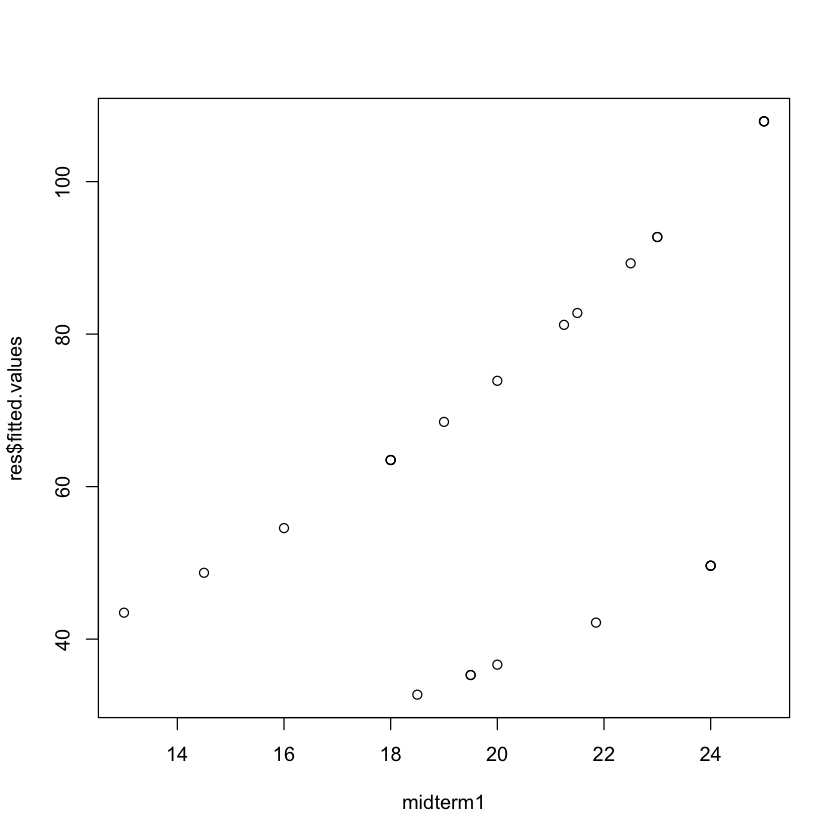

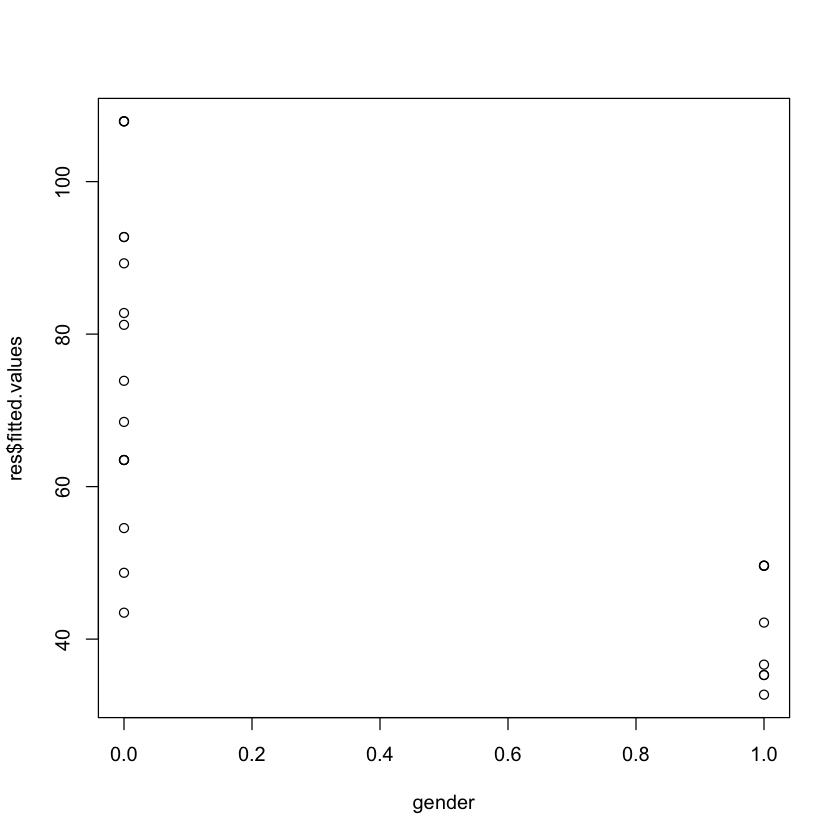

In [8]:
plot(midterm1, res$fitted.values)
plot(gender, res$fitted.values)

We note that there are two separate trends between the estimated average page view and midterm 1 scores. This is because of the gender difference; the top one is for male and the bottom one is for female. Such a difference is also clearly shown in the second plot.